<a href="https://colab.research.google.com/github/lorenzofilitti/Corpus-Material/blob/main/Vettori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

In [ ]:
!pip install spacy scikit-learn pandas numpy matplotlib

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[-0.30627403  0.14866458]
Plot saved as 'sentence_embeddings_2d_transformers.svg'


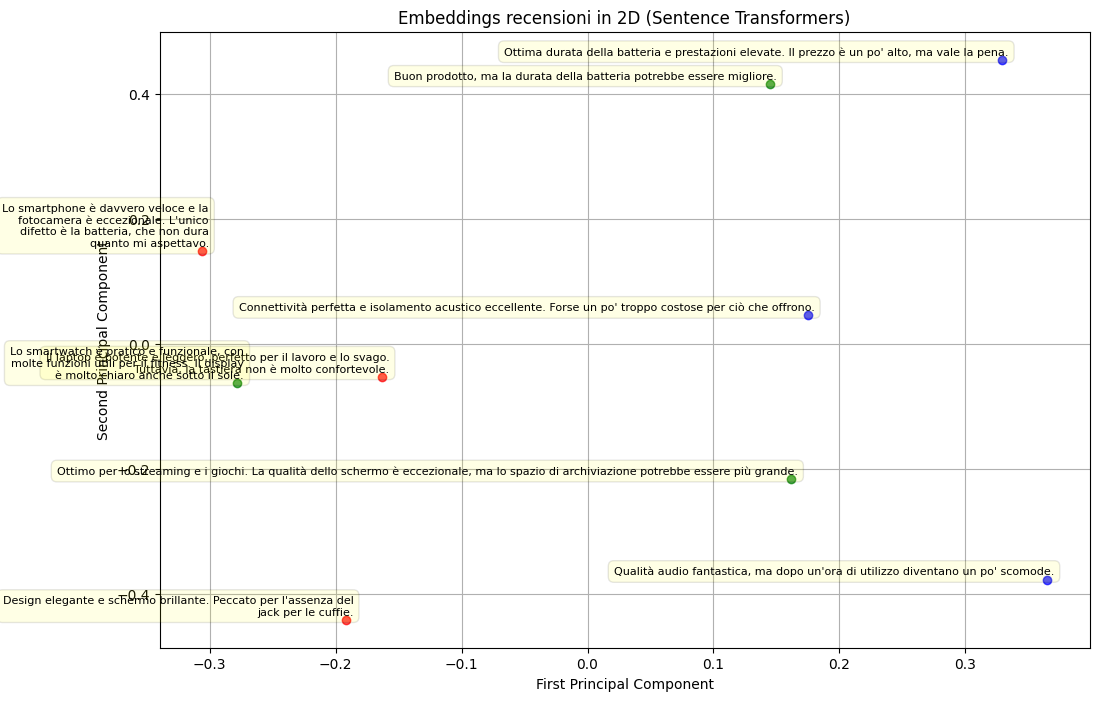

In [25]:
# Load the Sentence Transformer model

import json

file = open('Recensioni.json',  encoding='utf-8')
data = json.load(file)
Recensioni = []
for prodotti in data["Prodotti"]:
    for recensioni in prodotti["recensioni"]:
      Recensioni.append(recensioni["testo"])


model = SentenceTransformer('all-MiniLM-L6-v2')

# Get sentence vectors
vectors = model.encode(Recensioni)

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

categories = ["Sports", "Sports", "Sports", "Weather", "Weather", "Weather", "Food", "Food", "Food"]

colors = {'Sports': 'red', 'Weather': 'blue', 'Food': 'green'}
for i, (Recensioni, category) in enumerate(zip(Recensioni, categories)):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], c=colors[category], alpha=0.7)
    plt.annotate(Recensioni, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Embeddings recensioni in 2D (Sentence Transformers)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
#for category, color in colors.items():
 #   plt.scatter([], [], c=color, alpha=0.7, label=category)
#plt.legend()

# Save the plot as an SVG
#plt.savefig('sentence_embeddings_2d_transformers.svg', format='svg', bbox_inches='tight')
#print("Plot saved as 'sentence_embeddings_2d_transformers.svg'")


In [27]:
print(vectors, [0])

[[-0.03615173  0.11154132 -0.00157287 ...  0.09337302  0.03876317
  -0.00693976]
 [-0.05477584  0.11520361 -0.05172409 ...  0.07637845  0.02140646
   0.03431559]
 [ 0.01697342  0.03392915 -0.04728751 ...  0.08565716  0.04648031
  -0.06788834]
 ...
 [-0.06424391  0.05246922  0.01533257 ...  0.04713418  0.01027048
   0.00132305]
 [ 0.01482502  0.12658745 -0.02444095 ...  0.06806467 -0.05514979
  -0.01144695]
 [-0.01316739  0.11851187 -0.02244638 ...  0.02443897 -0.02819248
   0.02728781]] [0]
